# Hello! Welcome to the world of Pokemon!

My name is Jaden and I am a Pokemon researcher. Currently, I am working my way up to becoming a Pokemon professor. However, I lack the work experience required to become one. So this notebook is a way of showing off my skills as a programmer and data analyst using the fascinating world of Pokemon!

I have a strong background in Pokemon. This includes heavy knowledge on every Pokemon generation, Pokemon stats, types, movesets, etc. This information will help make the analysis more meaningful instead of only depending on the numbers we find to come up with conclusions. But by no means does this make me a professional competitive Pokemon battler. In fact, I'm not a fan of competitive play. Nonetheless, I hope the following analysis can help trainers around the world learn more about Pokemon from a statistical perspective.

With that out of the way, let's get started!

First, we need to declare the dataset that we will be using for the rest of the notebook. 

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('pokemon.csv')
df

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


Wow! This is a LOT of data...

Let's breakdown everything before we get started:

* This dataset consists of 7 generations of Pokemon (Gen 8 was not available)
* **abilities** (Column 0) shows the available abilities for each Pokemon
* Columns 1-18 show the damage multiplier a Pokemon takes against a specific type (0x, 0.5x, 1x, 2x, or 4x)
* **hp**, **attack**, **defense**, **sp_attack**, **sp_defense**, **speed**, and **base_total** are the base stats of all Pokemon (these will be useful for our analysis)
* **generation** indicates the Generation the Pokemon is from (1-7)
* **is_legendary** indicates if the Pokemon is a Legendary Pokemon (0 = False, 1 = True)

The rest of the data consists of miscellaneous data that we may not need in the future. So for now, let's clean and filter the data to find the relevant information we need moving forward.

# Cleaning Data

Let's start by grabbing the most important columns and ordering them appropriately instead of by alphabetical order:

In [8]:
cols = list(df.columns.values)
data = df[[cols[30]]+cols[36:38]+[cols[28]]+[cols[19]]+[cols[25]]+cols[33:35]+[cols[35]]+[cols[22]]+cols[1:19]+cols[39:41]]

data

,name,type1,type2,hp,attack,defense,sp_attack,sp_defense,speed,base_total,...,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,generation,is_legendary
0,Bulbasaur,grass,poison,45,49,49,65,65,45,318,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1,0
1,Ivysaur,grass,poison,60,62,63,80,80,60,405,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1,0
2,Venusaur,grass,poison,80,100,123,122,120,80,625,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,1,0
3,Charmander,fire,NaN,39,52,43,60,50,65,309,...,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,1,0
4,Charmeleon,fire,NaN,58,64,58,80,65,80,405,...,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,Celesteela,steel,flying,97,101,103,107,101,61,570,...,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,7,1
797,Kartana,grass,steel,59,181,131,59,31,109,570,...,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,7,1
798,Guzzlord,dark,dragon,223,101,53,97,53,43,570,...,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,7,1
799,Necrozma,psychic,NaN,97,107,101,127,89,79,600,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,7,1


In [14]:
# To show all of the columns in our modified Dataframe
data.columns

Index(['name', 'type1', 'type2', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'base_total', 'against_bug', 'against_dark',
       'against_dragon', 'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal', 'against_poison',
       'against_psychic', 'against_rock', 'against_steel', 'against_water',
       'generation', 'is_legendary'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              801 non-null    object 
 1   type1             801 non-null    object 
 2   type2             417 non-null    object 
 3   hp                801 non-null    int64  
 4   attack            801 non-null    int64  
 5   defense           801 non-null    int64  
 6   sp_attack         801 non-null    int64  
 7   sp_defense        801 non-null    int64  
 8   speed             801 non-null    int64  
 9   base_total        801 non-null    int64  
 10  against_bug       801 non-null    float64
 11  against_dark      801 non-null    float64
 12  against_dragon    801 non-null    float64
 13  against_electric  801 non-null    float64
 14  against_fairy     801 non-null    float64
 15  against_fight     801 non-null    float64
 16  against_fire      801 non-null    float64
 1

It seems that **type 2** is the only column with missing values. This is because there are many Pokemon with only 1 type. But for the sake of having clean data to work with, we will just change the empty **type 2** values to "None" instead.

In [17]:
data['type2'].fillna('None')

0      poison
1      poison
2      poison
3        None
4        None
        ...  
796    flying
797     steel
798    dragon
799      None
800     fairy
Name: type2, Length: 801, dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              801 non-null    object 
 1   type1             801 non-null    object 
 2   type2             801 non-null    object 
 3   hp                801 non-null    int64  
 4   attack            801 non-null    int64  
 5   defense           801 non-null    int64  
 6   sp_attack         801 non-null    int64  
 7   sp_defense        801 non-null    int64  
 8   speed             801 non-null    int64  
 9   base_total        801 non-null    int64  
 10  against_bug       801 non-null    float64
 11  against_dark      801 non-null    float64
 12  against_dragon    801 non-null    float64
 13  against_electric  801 non-null    float64
 14  against_fairy     801 non-null    float64
 15  against_fight     801 non-null    float64
 16  against_fire      801 non-null    float64
 1

Now we have a full, easy-to-read dataset of 801 Pokemon. We can now use this to gather basic statistics and graph plots based on the data we have found.

# Visualization

## Basic Statistics

We will start by gathering some information from the data by calling a few functions.

In [20]:
data.describe()

,hp,attack,defense,sp_attack,sp_defense,speed,base_total,against_bug,against_dark,against_dragon,...,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,68.958801,77.857678,73.008739,71.305868,70.911361,66.334582,428.377029,0.996255,1.057116,0.968789,...,1.098002,1.208177,0.887016,0.975343,1.005306,1.250312,0.983458,1.058365,3.690387,0.087391
std,26.576015,32.158820,30.769159,32.353826,27.942501,28.907662,119.203577,0.597248,0.438142,0.353058,...,0.738818,0.735356,0.266106,0.549375,0.495183,0.697148,0.500117,0.606562,1.930420,0.282583
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000,0.250000,0.250000,0.000000,...,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000,0.250000,1.000000,0.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,320.000000,0.500000,1.000000,1.000000,...,1.000000,0.500000,1.000000,0.500000,1.000000,1.000000,0.500000,0.500000,2.000000,0.000000
50%,65.000000,75.000000,70.000000,65.000000,66.000000,65.000000,435.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,0.000000
75%,80.000000,100.000000,90.000000,91.000000,90.000000,85.000000,505.000000,1.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,5.000000,0.000000
max,255.000000,185.000000,230.000000,194.000000,230.000000,180.000000,780.000000,4.000000,4.000000,2.000000,...,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,7.000000,1.000000


In [34]:
cols = list(data.columns.values)

# All of the "against" columns
data[cols[10:28]].mean().sort_values(ascending=False)

against_rock        1.250312
against_ice         1.208177
against_flying      1.192884
against_fire        1.135456
against_ground      1.098002
against_electric    1.073970
against_fairy       1.068976
against_fight       1.065543
against_water       1.058365
against_dark        1.057116
against_grass       1.034020
against_psychic     1.005306
against_bug         0.996255
against_ghost       0.985019
against_steel       0.983458
against_poison      0.975343
against_dragon      0.968789
against_normal      0.887016
dtype: float64

From the table above, we can make a few predictions as to what the data is telling us:
* There may be a significant number of high physical attackers than special attackers based on the averages of both stats (outliers can lead to this conclusion)
* To compensate for the high physical damage, a large number of Pokemon with a high defense stat may have been added
* There are more Pokemon weak against Rock than all other types

Let's delve into the "Attack" stat a little more.

In [37]:
data.groupby(['type1']).mean().sort_values('attack', ascending=False)

,hp,attack,defense,sp_attack,sp_defense,speed,base_total,against_bug,against_dark,against_dragon,...,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,generation,is_legendary
type1,,,,,,,,,,,,,,,,,,,,,
dragon,79.851852,106.407407,86.259259,89.592593,84.555556,76.111111,522.777778,0.944444,1.037037,2.000000,...,0.925926,2.518519,1.000000,0.925926,1.037037,1.111111,1.000000,0.592593,4.296296,0.259259
fighting,71.428571,99.178571,66.392857,50.107143,63.428571,64.285714,414.821429,0.535714,0.526786,0.982143,...,1.000000,1.000000,0.982143,0.964286,1.821429,0.526786,1.017857,1.000000,3.750000,0.000000
ground,73.187500,94.812500,83.906250,51.937500,62.281250,59.968750,426.093750,1.062500,1.078125,1.046875,...,1.062500,2.281250,0.875000,0.445312,0.859375,0.539062,1.062500,2.125000,3.343750,0.062500
steel,66.791667,93.083333,120.208333,72.708333,82.208333,56.583333,491.583333,0.531250,1.291667,0.458333,...,2.083333,0.583333,0.406250,0.000000,0.458333,0.520833,0.625000,1.145833,4.208333,0.250000
rock,66.333333,90.666667,96.266667,63.200000,73.377778,57.422222,447.266667,0.988889,1.000000,0.966667,...,1.911111,1.188889,0.483333,0.472222,0.966667,1.066667,1.977778,2.044444,3.800000,0.088889
dark,72.551724,87.793103,70.517241,74.517241,69.068966,75.310345,449.758621,1.724138,0.534483,1.103448,...,0.965517,1.206897,0.931034,0.913793,0.000000,1.241379,1.000000,1.000000,4.275862,0.103448
fire,68.730769,81.500000,67.788462,87.730769,71.538462,73.346154,450.634615,0.456731,0.951923,1.009615,...,1.846154,0.576923,0.980769,0.951923,1.076923,2.057692,0.500000,2.076923,3.634615,0.096154
normal,76.723810,75.161905,59.695238,56.980952,63.200000,69.533333,401.295238,0.895238,1.000000,0.971429,...,0.742857,1.280952,1.000000,1.052381,1.004762,1.233333,1.033333,0.990476,3.495238,0.028571
grass,65.358974,73.769231,70.871795,74.320513,69.230769,59.025641,412.576923,1.717949,0.967949,0.916667,...,0.570513,2.115385,0.967949,1.846154,1.147436,1.057692,1.070513,0.506410,3.935897,0.051282


By grouping together the typings of Pokemon, **Dragon** takes the lead in average damage, followed by **Fighting** and **Ground**. So we can expect a large number of Dragon, Fighting, or Ground Pokemon to be seen on teams that require physical damage.

A better visualization of this can be shown below:

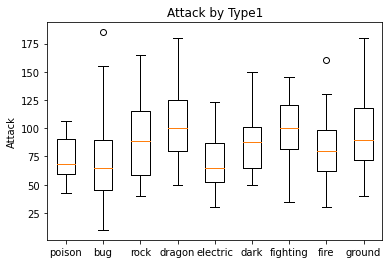

In [93]:
typelist = list(set(data['type1'].values))
y = []
for x in typelist[:9]:
    y.append(data.loc[df['type1'] == x]['attack'])

plt.boxplot(y, labels=typelist[:9])

plt.ylabel('Attack')
plt.title('Attack by Type1')

plt.show()

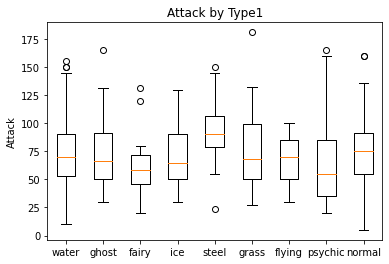

In [94]:
y = []
for x in typelist[9:]:
    y.append(data.loc[df['type1'] == x]['attack'])

plt.boxplot(y, labels=typelist[9:])

plt.ylabel('Attack')
plt.title('Attack by Type1')

plt.show()

Since 18 typings cannot fit on a single boxplot, I split it in two.

This information will be relevant later when we try to come up with ways to create the best team of six Pokemon.

What is the total type distribution of Pokemon?

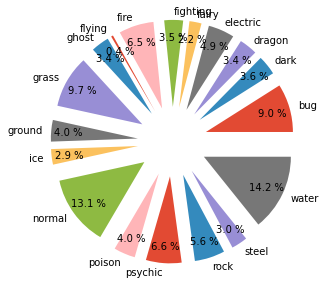

In [157]:
plt.style.use('ggplot')

labels = list(set(data['type1'].values))
labels.sort()
numofpoke = list(data.groupby(['type1']).count()['name'].values)
explode = (.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,.4,)

plt.pie(numofpoke, labels=labels, autopct='%.1f %%', pctdistance=0.8, explode=explode)

plt.show()